 # <h1><i><center>MACHINE LEARNING PROJECT PHASE 1</center></i></h1>


## DATA SET-3

## Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import spacy
import csv
import string
import seaborn as sns
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv("enronSpamSubset.csv").sample(frac=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,Body,Label
503,14355,14355,"Subject: the technews - bulletin , may 2005\n ...",1
5071,25338,25338,Subject: global ops task force week ending 9 /...,0
1756,9701,9701,Subject: pictures\n authentic replica rolex an...,1
6232,31299,31299,Subject: california update 3 / 15 / 01\n execu...,0
1628,15515,15515,Subject: pinnacle liquid edition 6 . 0 - $ 39 ...,1


## Data Preprocessing(Text Data)

In [3]:
#Dropping unwanted columns
df.drop('Unnamed: 0',inplace=True,axis=1)
df.drop('Unnamed: 0.1',inplace=True,axis=1)

In [4]:
#Removing null values
df.dropna(inplace=True)

### Text related preprocessing (stop words removal, word lemmatizing)

In [5]:
#Function to remove all unwanted characters in our data
def clean(text):
    text = text[9:]
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+','',text)
    text = BeautifulSoup(text, "lxml").text
    text = re.sub('[^A-Za-z0-9.]+', ' ',text)
    
    #tokenization
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
   
    text = y[:]
    y.clear()
    
    #Removal of stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Lemmatization
    lemma = WordNetLemmatizer()
    for i in text:
        y.append(lemma.lemmatize(i))
        
    return " ".join(y)

In [6]:
df['clean'] = df['Body'].apply(clean)

### Conversionof text data to numeric (Tf-idf)

In [21]:
tfidf = TfidfVectorizer(max_features=17000) 
X = tfidf.fit_transform(df['clean']).toarray()
X

array([[0.02628332, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Data Summarization

In [8]:
df.describe()

,Label
count,10000.000000
mean,0.500000
std,0.500025
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [9]:
df.shape

(10000, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 503 to 5091
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    10000 non-null  object
 1   Label   10000 non-null  int64 
 2   clean   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


## Data Visualization

<AxesSubplot:>

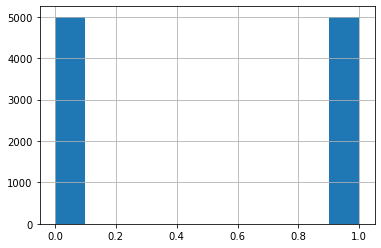

In [11]:
df['Label'].hist()

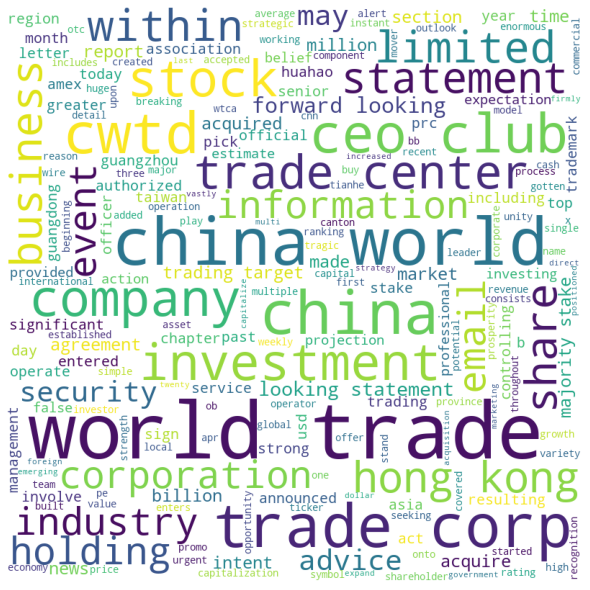

In [12]:
w = df['clean'][0]
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(w)
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

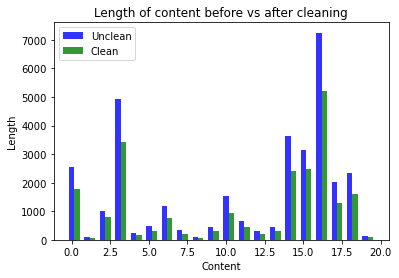

In [13]:
unclean = [len(x) for x in df["Body"]]
clean = [len(y) for y in df['clean']]

n_groups = 20
a = unclean[:20]
b = clean[:20]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, a, bar_width,
                    alpha=opacity,  
                    color='b',
                    label='Unclean')

rects2 = plt.bar(index + bar_width, b, bar_width, 
                    alpha=opacity,  
                    color='g',  
                    label='Clean')

plt.xlabel('Content')
plt.ylabel('Length')
plt.title('Length of content before vs after cleaning')
plt.legend()

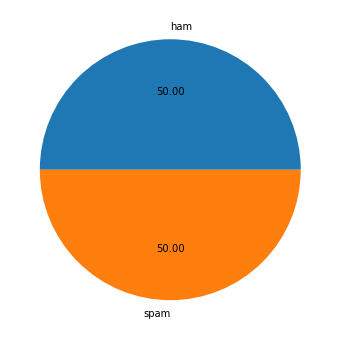

In [14]:
plt.figure(figsize=(12,6))
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

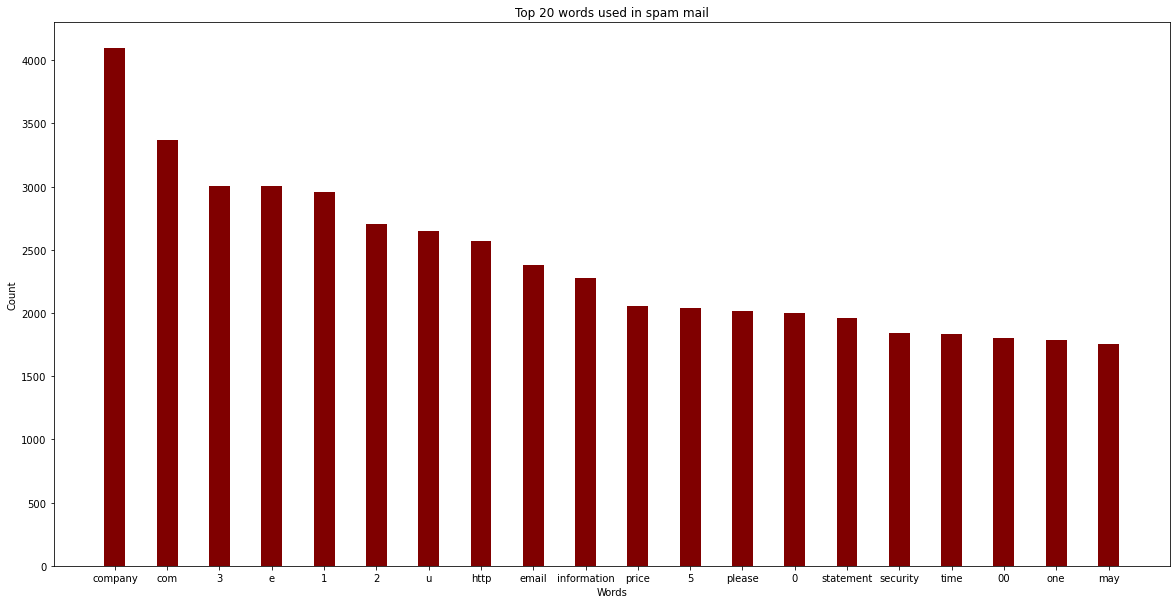

In [15]:
words = []

for mail in df[df['Label'] == 1]['clean'].tolist():
    for y in mail.split():
        words.append(y)
        
c = Counter(words)

words.clear()

count = []

for x,y in c.most_common(20):
    words.append(x)
    count.append(y)
    
fig = plt.figure(figsize = (20, 10))

plt.bar(words, count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 20 words used in spam mail")
plt.show()

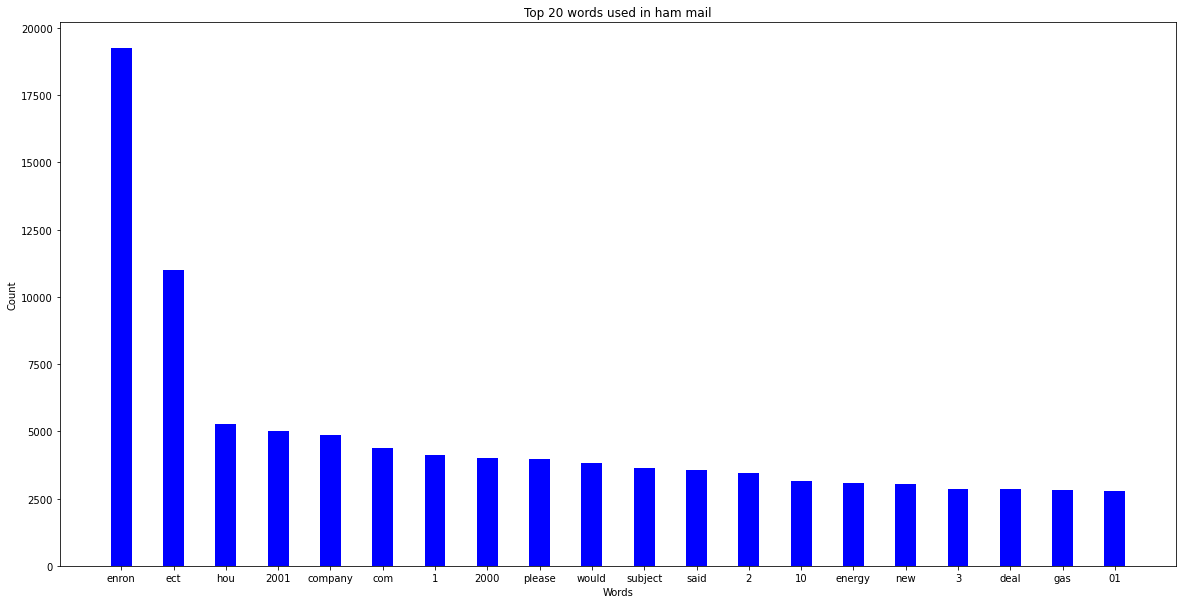

In [16]:
words = []

for mail in df[df['Label'] == 0]['clean'].tolist():
    for y in mail.split():
        words.append(y)
        
c = Counter(words)

words.clear()

count = []

for x,y in c.most_common(20):
    words.append(x)
    count.append(y)
    
fig = plt.figure(figsize = (20, 10))
 
plt.bar(words, count, color ='blue',
        width = 0.4)
 
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 20 words used in ham mail")
plt.show()

## Saving data as csv

In [17]:
arr = df['clean'].tolist()
df_arr = pd.DataFrame(arr)
df_arr.to_csv('cleaned3.csv')

## Phase 2

In [19]:
def showCM(cm):
    sns.heatmap(cm, annot=True, fmt="d")

In [22]:
X

array([[0.02628332, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
Y = df["Label"]

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)
X_train = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_test)

## KNN

In [33]:
best_score = 0

for i in range(3, 150):
    knnclf = KNeighborsClassifier(n_neighbors=i)
    
    folds= KFold(n_splits=5,shuffle=True,random_state=100)
    scores=cross_val_score(knnclf, X_train, Y_train, scoring='accuracy', cv=folds)
    mean_score = np.mean(scores)
    if mean_score > best_score:
        print(i, mean_score)
        best_score = mean_score
        best_k = i               

3 0.5725
4 0.6395000000000001
6 0.779
8 0.9395
10 0.951
12 0.9550000000000001
14 0.9645000000000001
16 0.9650000000000001
18 0.966
26 0.967
28 0.968


In [34]:
best_k

28

In [37]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None)

A = 0

for train, val in rkf.split(X_train):
    knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_train.iloc[train, :], Y_train.iloc[train, :])
    Acc = accuracy_score(knn.predict(X_train.iloc[val, :]), Y_train.iloc[val, :])
    if(A < Acc):
        A = Acc
        print(Acc)
        best_knnclf = knn

0.9625
0.965
0.97
0.9775
0.98


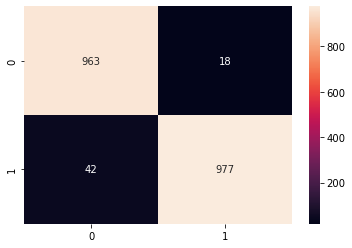

In [38]:
showCM(confusion_matrix(best_knnclf.predict(X_test), Y_test))

## Logistic Regression


In [51]:
from sklearn.linear_model import LogisticRegression

In [40]:
rkf = RepeatedKFold(n_splits=5, n_repeats = 5, random_state=10)

acc = 0

for train, val in rkf.split(X_train):
    LRclf = LogisticRegression().fit(X_train.iloc[train, :], Y_train.iloc[train, :])
    n_acc = accuracy_score(LRclf.predict(X_train.iloc[val, :]), Y_train.iloc[val, :])
    
    if(n_acc > acc):
        print(n_acc)
        acc = n_acc
        best_lrcclf = LRclf

0.965
0.97
0.9725
0.975
0.9775
0.98


<AxesSubplot:>

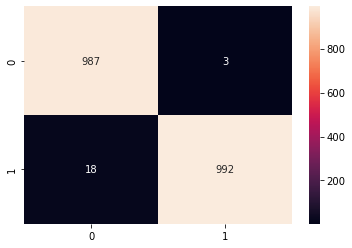

In [41]:
sns.heatmap(confusion_matrix(best_lrcclf.predict(X_test), Y_test), annot=True, fmt="d")

## Naive Bayes Classifier

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
acc = 0
cv = ShuffleSplit(n_splits=20)
split = 1

for train, val in cv.split(X_train):    
    for alpha in [0.1, 0.5, 1, 1.5, 2]:
        mnb = MultinomialNB(alpha)        
        mnb.fit(X_train.iloc[train, :], Y_train.iloc[train, :])
        accuracy = accuracy_score(mnb.predict(X_train.iloc[val, :]), Y_train.iloc[val, :])

        if(accuracy > acc):
            print(f"Accuracy Score for Naive Bayes (aplha = {alpha}, split = {split}) : ", accuracy)
            acc = accuracy
            best_mnb = mnb
    
    split += 1

Accuracy Score for Naive Bayes (aplha = 0.1, split = 1) :  1.0


<AxesSubplot:>

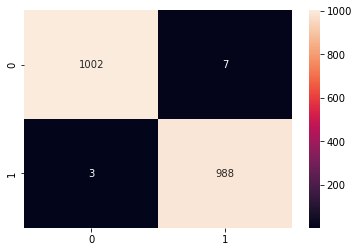

In [44]:
cm = confusion_matrix(best_mnb.predict(X_test), Y_test)
sns.heatmap(cm, annot=True, fmt='d')

## SVC

In [46]:
from sklearn.svm import SVC

In [47]:
acc = 0
kf = KFold(n_splits=5, shuffle=True, random_state=None)

for train, test in kf.split(X_train):
    for c in  [0.1, 1, 10]:
        for kernel in ['linear', 'rbf', 'poly']:
            svm = SVC(C=c, kernel=kernel).fit(X_train.iloc[train, :], Y_train.iloc[train, :])
            n_acc = accuracy_score(svm.predict(X_train.iloc[val, :]), Y_train.iloc[val, :])

            if n_acc > acc:
                print(n_acc, f"C={c} ,kernel = {kernel}")
                acc = n_acc
                best_svm = svm

0.92 C=0.1 ,kernel = linear
0.99 C=1 ,kernel = linear
0.995 C=1 ,kernel = poly
1.0 C=1 ,kernel = linear


<AxesSubplot:>

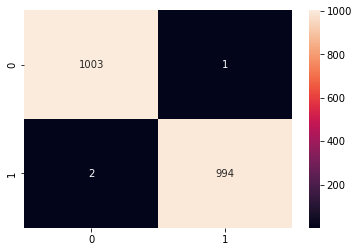

In [48]:
sns.heatmap(confusion_matrix(best_svm.predict(X_test), Y_test), annot=True, fmt='d')

## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=None)
acc = 0

for train, test in kf.split(X_train):
    rfc = RandomForestClassifier().fit(X_train.iloc[train, :], Y_train.iloc[train, :])
    n_acc = accuracy_score(rfc.predict(X_train.iloc[val, :]), Y_train.iloc[val, :])

    if n_acc > acc:
        acc = n_acc
        best_rfc = rfc

0.993


<AxesSubplot:>

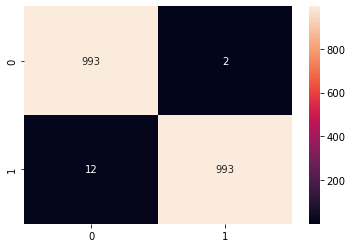

In [55]:
print(accuracy_score(best_rfc.predict(X_test), Y_test))
sns.heatmap(confusion_matrix(best_rfc.predict(X_test), Y_test), annot=True, fmt="d")

## Comparing classifiers

## Accuracy Scores

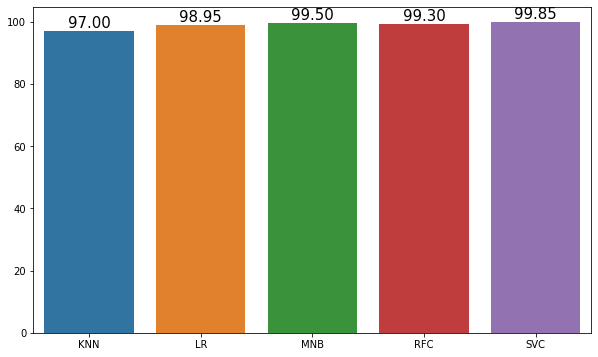

In [56]:
width = 0.5
plt.figure(figsize=(10, 6))
plots = sns.barplot(["KNN", "LR", "MNB", "RFC", "SVC"],
                    [accuracy_score(i.predict(X_test), Y_test)*100 for i in [best_knnclf, best_lrcclf,
                                                                             best_mnb, best_rfc, best_svm]])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')